# 가중치 최소화 알고리즘
: 처음 가중치를 줄 때 그럴듯한 값으로 주자

Relu -> He                                제곱근
: np.random.randn(입력노드수, 출력노드수) / np.sqrt(입력노드수/2)
initializer=tf.keras.initializers.he_normal()

sigmoid -> Xavier
: np.random.randn(입력노드수, 출력노드수) / np.sqrt(입력노드수)
initializer=tf.contrib.layers.xavier_initializer()

In [1]:
import tensorflow as tf
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import tensorflow.examples.tutorials.mnist
from tensorflow.examples.tutorials.mnist import input_data

import warnings
warnings.filterwarnings('ignore')

In [2]:
# MNIST 데이터셋 다운로드
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
x = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

w1 = tf.get_variable('w1', shape=[28*28, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable('w2', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2)+b2)

w3 = tf.get_variable('w3', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
l3 = tf.nn.relu(tf.matmul(l2,w3)+b3)

w4 = tf.get_variable('w4', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]))
l4 = tf.nn.relu(tf.matmul(l3,w4)+b4)

w5 = tf.get_variable('w5', shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))


hf = tf.nn.softmax(tf.matmul(l4,w5)+b5)                         # score
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(0.001).minimize(cost)
'''                 ||
- 전통적 경사하강법 : 매번 미분함 => 속도 느림
- 확률적 경사하강법(sgd) : 속도 개선
- 모멘텀(momentum : 관성, 가속도) sgd : sgd + 관성
- 아다그리드 : step size 개선
- rmsprop : 아다그리드 개선
- 아담(Adam) : 모멘턴 + rmsprop
'''

prediction = tf.equal(tf.argmax(hf, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [9]:
trainingEpochs = 15
batch_size = 100

In [12]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(trainingEpochs) :
        avgCost = 0
        totalBatch = int(mnist.train.num_examples/batch_size)
        for i in range(totalBatch) :
            batchX, batchY = mnist.train.next_batch(batch_size=batch_size)
            _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:batchX, y:batchY})
            avgCost += cv/totalBatch
        if epoch % 2 == 0 :
            print('Step : {}, cost : {}, acc : {}'.format(epoch, avgCost, acc))
    print('정확도 : ', sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

Step : 0, cost : 1.6210479283332841, acc : 0.9300000071525574
Step : 2, cost : 1.5091502820361746, acc : 0.9800000190734863
Step : 4, cost : 1.5010861854119748, acc : 0.9900000095367432
Step : 6, cost : 1.497576420090415, acc : 0.9700000286102295
Step : 8, cost : 1.4947312979264689, acc : 0.9800000190734863
Step : 10, cost : 1.4941902752356098, acc : 0.9599999785423279
Step : 12, cost : 1.5008051176504673, acc : 0.9599999785423279
Step : 14, cost : 1.4975307609818205, acc : 0.9800000190734863
정확도 :  0.9599


# keras처럼 보이게하기

In [14]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(trainingEpochs) :
        avgCost = 0
        totalBatch = int(mnist.train.num_examples/batch_size)
        
        pbar = tqdm(range(totalBatch))
        
        for i in pbar :
            batchX, batchY = mnist.train.next_batch(batch_size=batch_size)
            _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:batchX, y:batchY})
            avgCost += cv/totalBatch
            pbar.set_description('cost:%f' %avgCost)
    print('정확도 : ', sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))


cost:0.220071:  11%|███████▎                                                         | 62/550 [00:00<00:04, 108.39it/s]


cost:0.412324:  21%|█████████████▋                                                  | 118/550 [00:00<00:03, 127.75it/s]


cost:0.600849:  34%|█████████████████████▋                                          | 186/550 [00:01<00:03, 116.43it/s]


cost:0.789814:  44%|████████████████████████████▏                                   | 242/550 [00:02<00:02, 130.72it/s]


cost:0.969446:  57%|████████████████████████████████████▎                           | 312/550 [00:02<00:01, 132.68it/s]


cost:1.151040:  67%|██████████████████████████████████████████▊                     | 368/550 [00:02<00:01, 133.53it/s]


cost:1.327521:  80%|██████████████████████████████████████████████████▉             | 438/550 [00:03<00:00, 131.78it/s]


cost:1.506674:  90%|█████████████████████████████████████████████████████████▌      | 495/550 [00:03<00:00, 137.73it/s]


cost:1.627308: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 127.17it/s]

cost:0.055413:   3%|█▊                                                               | 15/550 [00:00<00:03, 148.51it/s]


cost:0.233015:  14%|████████▊                                                        | 75/550 [00:00<00:03, 144.20it/s]


cost:0.407808:  27%|█████████████████                                               | 147/550 [00:01<00:02, 137.67it/s]


cost:0.584575:  37%|███████████████████████▌                                        | 203/550 [00:01<00:02, 133.82it/s]


cost:0.758243:  49%|███████████████████████████████▋                                | 272/550 [00:02<00:02, 123.38it/s]


cost:0.935487:  59%|██████████████████████████████████████                          | 327/550 [00:02<00:01, 126.18it/s]


cost:1.109283:  72%|██████████████████████████████████████████████▏                 | 397/550 [00:03<00:01, 134.12it/s]


cost:1.286065:  82%|████████████████████████████████████████████████████▋           | 453/550 [00:03<00:00, 135.50it/s]


cost:1.459850:  95%|████████████████████████████████████████████████████████████▉   | 524/550 [00:03<00:00, 136.15it/s]


cost:1.520450: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 128.96it/s]

cost:0.112853:   7%|████▊                                                            | 41/550 [00:00<00:03, 130.97it/s]


cost:0.288358:  17%|███████████▎                                                     | 96/550 [00:00<00:03, 132.28it/s]


cost:0.460769:  30%|███████████████████                                             | 164/550 [00:01<00:02, 131.73it/s]


cost:0.636220:  40%|█████████████████████████▌                                      | 220/550 [00:01<00:02, 130.28it/s]


cost:0.809168:  53%|█████████████████████████████████▋                              | 289/550 [00:02<00:01, 132.11it/s]


cost:0.984504:  63%|████████████████████████████████████████▎                       | 346/550 [00:02<00:01, 133.99it/s]


cost:1.157216:  77%|████████████████████████████████████████████████▉               | 421/550 [00:03<00:00, 136.59it/s]


cost:1.332846:  87%|███████████████████████████████████████████████████████▉        | 481/550 [00:03<00:00, 141.90it/s]


cost:1.507976: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 130.36it/s]



cost:0.171866:  10%|██████▌                                                          | 56/550 [00:00<00:03, 136.31it/s]


cost:0.344530:  22%|██████████████                                                  | 121/550 [00:00<00:03, 125.43it/s]


cost:0.517181:  34%|█████████████████████▉                                          | 188/550 [00:01<00:02, 129.96it/s]


cost:0.692054:  44%|████████████████████████████▍                                   | 244/550 [00:01<00:02, 131.83it/s]


cost:0.863819:  57%|████████████████████████████████████▊                           | 316/550 [00:02<00:01, 135.64it/s]


cost:1.038766:  68%|███████████████████████████████████████████▎                    | 372/550 [00:02<00:01, 133.56it/s]


cost:1.211206:  81%|███████████████████████████████████████████████████▌            | 443/550 [00:03<00:00, 135.18it/s]


cost:1.386460:  91%|██████████████████████████████████████████████████████████      | 499/550 [00:03<00:00, 133.93it/s]


cost:1.503768: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 128.08it/s]

cost:0.054521:   3%|█▋                                                               | 14/550 [00:00<00:03, 135.92it/s]


cost:0.226848:  15%|█████████▍                                                       | 80/550 [00:00<00:03, 130.36it/s]


cost:0.401598:  25%|███████████████▋                                                | 135/550 [00:01<00:03, 132.74it/s]


cost:0.573360:  37%|███████████████████████▊                                        | 205/550 [00:01<00:02, 132.53it/s]


cost:0.747953:  48%|██████████████████████████████▍                                 | 262/550 [00:02<00:02, 134.96it/s]


cost:0.920088:  61%|███████████████████████████████████████▏                        | 337/550 [00:02<00:01, 140.32it/s]


cost:1.094341:  72%|██████████████████████████████████████████████▏                 | 397/550 [00:02<00:01, 143.36it/s]


cost:1.268681:  83%|█████████████████████████████████████████████████████▎          | 458/550 [00:03<00:00, 143.46it/s]


cost:1.442684:  94%|████████████████████████████████████████████████████████████▍   | 519/550 [00:03<00:00, 138.42it/s]


cost:1.499931: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 132.43it/s]

cost:0.114153:   5%|███▎                                                             | 28/550 [00:00<00:03, 136.85it/s]


cost:0.285411:  18%|███████████▍                                                     | 97/550 [00:00<00:03, 132.13it/s]


cost:0.456768:  30%|███████████████████▎                                            | 166/550 [00:01<00:03, 126.09it/s]


cost:0.631379:  40%|█████████████████████████▌                                      | 220/550 [00:01<00:02, 129.97it/s]


cost:0.803667:  53%|█████████████████████████████████▉                              | 292/550 [00:02<00:01, 135.86it/s]


cost:0.978207:  63%|████████████████████████████████████████▍                       | 348/550 [00:02<00:01, 134.67it/s]


cost:1.149855:  76%|████████████████████████████████████████████████▍               | 416/550 [00:03<00:01, 126.53it/s]


cost:1.321411:  88%|████████████████████████████████████████████████████████▍       | 485/550 [00:03<00:00, 125.61it/s]


cost:1.496584:  98%|██████████████████████████████████████████████████████████████▉ | 541/550 [00:04<00:00, 129.88it/s]


cost:1.499368: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 126.70it/s]

cost:0.170453:  10%|██████▌                                                          | 56/550 [00:00<00:03, 134.91it/s]


cost:0.344693:  20%|█████████████                                                   | 112/550 [00:00<00:03, 133.30it/s]


cost:0.516565:  33%|█████████████████████▍                                          | 184/550 [00:01<00:02, 137.73it/s]


cost:0.690892:  44%|████████████████████████████▍                                   | 244/550 [00:01<00:02, 142.52it/s]


cost:0.865238:  55%|███████████████████████████████████▎                            | 304/550 [00:02<00:01, 144.88it/s]


cost:1.037021:  69%|████████████████████████████████████████████                    | 379/550 [00:02<00:01, 145.12it/s]


cost:1.211039:  79%|██████████████████████████████████████████████████▊             | 437/550 [00:03<00:00, 133.45it/s]


cost:1.382999:  92%|██████████████████████████████████████████████████████████▉     | 506/550 [00:03<00:00, 127.16it/s]


cost:1.499973: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 131.26it/s]

cost:0.054228:   3%|█▊                                                               | 15/550 [00:00<00:03, 148.51it/s]


cost:0.227924:  13%|████████▎                                                        | 70/550 [00:00<00:03, 136.62it/s]


cost:0.399285:  25%|████████████████▏                                               | 139/550 [00:01<00:03, 133.02it/s]


cost:0.570423:  38%|████████████████████████▎                                       | 209/550 [00:01<00:02, 131.67it/s]


cost:0.744794:  48%|██████████████████████████████▊                                 | 265/550 [00:02<00:02, 134.94it/s]


cost:0.916066:  61%|██████████████████████████████████████▉                         | 335/550 [00:02<00:01, 136.25it/s]


cost:1.090178:  71%|█████████████████████████████████████████████▍                  | 391/550 [00:02<00:01, 134.15it/s]


cost:1.261508:  84%|█████████████████████████████████████████████████████▋          | 461/550 [00:03<00:00, 134.71it/s]


cost:1.435961:  94%|████████████████████████████████████████████████████████████▏   | 517/550 [00:03<00:00, 132.97it/s]


cost:1.496110: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 129.93it/s]

cost:0.111650:   5%|███▎                                                             | 28/550 [00:00<00:03, 136.54it/s]


cost:0.283805:  18%|███████████▋                                                     | 99/550 [00:00<00:03, 129.66it/s]


cost:0.457941:  28%|█████████████████▉                                              | 154/550 [00:01<00:03, 131.40it/s]


cost:0.630266:  42%|██████████████████████████▋                                     | 229/550 [00:01<00:02, 142.02it/s]


cost:0.805005:  53%|█████████████████████████████████▉                              | 292/550 [00:02<00:01, 149.28it/s]


cost:0.979364:  64%|████████████████████████████████████████▉                       | 352/550 [00:02<00:01, 141.98it/s]


cost:1.153450:  75%|███████████████████████████████████████████████▋                | 410/550 [00:03<00:01, 136.35it/s]


cost:1.324740:  87%|███████████████████████████████████████████████████████▊        | 480/550 [00:03<00:00, 134.01it/s]


cost:1.499163: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.69it/s]



cost:0.171378:  10%|██████▌                                                          | 56/550 [00:00<00:03, 136.13it/s]


cost:0.342365:  23%|██████████████▌                                                 | 125/550 [00:00<00:03, 128.17it/s]


cost:0.516690:  33%|█████████████████████                                           | 181/550 [00:01<00:02, 131.02it/s]


cost:0.688306:  46%|█████████████████████████████▏                                  | 251/550 [00:01<00:02, 135.44it/s]


cost:0.862776:  56%|███████████████████████████████████▋                            | 307/550 [00:02<00:01, 130.83it/s]


cost:1.034258:  69%|███████████████████████████████████████████▊                    | 377/550 [00:02<00:01, 135.10it/s]


cost:1.209815:  79%|██████████████████████████████████████████████████▌             | 434/550 [00:03<00:00, 133.83it/s]


cost:1.381055:  92%|██████████████████████████████████████████████████████████▋     | 504/550 [00:03<00:00, 134.82it/s]


cost:1.498203: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 129.44it/s]

cost:0.054127:   3%|█▉                                                               | 16/550 [00:00<00:03, 150.94it/s]


cost:0.227296:  14%|████████▊                                                        | 75/550 [00:00<00:03, 146.40it/s]


cost:0.401492:  24%|███████████████▌                                                | 134/550 [00:01<00:02, 143.84it/s]


cost:0.573193:  37%|███████████████████████▊                                        | 205/550 [00:01<00:02, 136.43it/s]


cost:0.746931:  48%|██████████████████████████████▌                                 | 263/550 [00:01<00:02, 136.17it/s]


cost:0.918250:  61%|██████████████████████████████████████▋                         | 333/550 [00:02<00:01, 133.80it/s]


cost:1.092579:  71%|█████████████████████████████████████████████▎                  | 389/550 [00:02<00:01, 136.59it/s]


cost:1.263509:  84%|█████████████████████████████████████████████████████▋          | 461/550 [00:03<00:00, 136.50it/s]


cost:1.438073:  94%|████████████████████████████████████████████████████████████▏   | 517/550 [00:03<00:00, 135.99it/s]


cost:1.495079: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.40it/s]

cost:0.114072:   5%|███▌                                                             | 30/550 [00:00<00:03, 141.91it/s]


cost:0.286068:  18%|███████████▌                                                     | 98/550 [00:00<00:03, 134.60it/s]


cost:0.460914:  28%|█████████████████▉                                              | 154/550 [00:01<00:02, 136.00it/s]


cost:0.632963:  41%|██████████████████████████▎                                     | 226/550 [00:01<00:02, 138.10it/s]


cost:0.807589:  51%|████████████████████████████████▉                               | 283/550 [00:02<00:01, 136.53it/s]


cost:0.979166:  64%|█████████████████████████████████████████▏                      | 354/550 [00:02<00:01, 137.73it/s]


cost:1.153445:  75%|███████████████████████████████████████████████▊                | 411/550 [00:03<00:01, 138.65it/s]


cost:1.327761:  86%|██████████████████████████████████████████████████████▉         | 472/550 [00:03<00:00, 142.95it/s]


cost:1.499194: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 134.70it/s]

  0%|                                                                                          | 0/550 [00:00<?, ?it/s]


cost:0.174701:  11%|███████▏                                                         | 61/550 [00:00<00:03, 146.03it/s]


cost:0.348258:  21%|█████████████▋                                                  | 118/550 [00:00<00:03, 138.04it/s]


cost:0.520003:  34%|█████████████████████▉                                          | 188/550 [00:01<00:02, 133.41it/s]


cost:0.694097:  44%|████████████████████████████▍                                   | 244/550 [00:01<00:02, 136.27it/s]


cost:0.865769:  57%|████████████████████████████████████▋                           | 315/550 [00:02<00:01, 135.02it/s]


cost:1.040018:  67%|███████████████████████████████████████████▏                    | 371/550 [00:02<00:01, 136.71it/s]


cost:1.211644:  80%|███████████████████████████████████████████████████▍            | 442/550 [00:03<00:00, 136.24it/s]


cost:1.386561:  91%|██████████████████████████████████████████████████████████▏     | 500/550 [00:03<00:00, 136.39it/s]


cost:1.498665: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 132.37it/s]

cost:0.060035:   3%|█▋                                                               | 14/550 [00:00<00:03, 137.25it/s]


cost:0.234673:  13%|████████▍                                                        | 71/550 [00:00<00:03, 137.72it/s]


cost:0.405668:  26%|████████████████▌                                               | 142/550 [00:01<00:03, 134.84it/s]


cost:0.579715:  36%|███████████████████████▎                                        | 200/550 [00:01<00:02, 138.17it/s]


cost:0.750404:  49%|███████████████████████████████▍                                | 270/550 [00:02<00:02, 135.78it/s]


cost:0.925079:  60%|██████████████████████████████████████▎                         | 329/550 [00:02<00:01, 141.73it/s]


cost:1.099099:  71%|█████████████████████████████████████████████▍                  | 391/550 [00:02<00:01, 148.06it/s]


cost:1.273576:  82%|████████████████████████████████████████████████████▋           | 453/550 [00:03<00:00, 144.83it/s]


cost:1.444311:  97%|█████████████████████████████████████████████████████████████▊  | 531/550 [00:03<00:00, 148.03it/s]


cost:1.495919: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.95it/s]

cost:0.119105:   8%|████▉                                                            | 42/550 [00:00<00:03, 138.07it/s]


cost:0.293076:  18%|███████████▌                                                     | 98/550 [00:00<00:03, 136.69it/s]


cost:0.464418:  31%|███████████████████▋                                            | 169/550 [00:01<00:02, 136.60it/s]


cost:0.638645:  41%|██████████████████████████▎                                     | 226/550 [00:01<00:02, 138.97it/s]


cost:0.809933:  54%|██████████████████████████████████▌                             | 297/550 [00:02<00:01, 137.33it/s]


cost:0.983645:  64%|█████████████████████████████████████████▏                      | 354/550 [00:02<00:01, 137.55it/s]


cost:1.154931:  77%|█████████████████████████████████████████████████▎              | 424/550 [00:03<00:00, 134.74it/s]


cost:1.328460:  87%|███████████████████████████████████████████████████████▉        | 481/550 [00:03<00:00, 137.25it/s]


cost:1.494174: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.08it/s]


정확도 :  0.9602


In [17]:
# tensorflow 그래프 초기화 함수
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

w1 = tf.get_variable('w1', shape=[28*28, 256], initializer=tf.keras.initializers.he_normal())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable('w2', shape=[256, 256], initializer=tf.keras.initializers.he_normal())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2)+b2)

w3 = tf.get_variable('w3', shape=[256, 256], initializer=tf.keras.initializers.he_normal())
b3 = tf.Variable(tf.random_normal([256]))
l3 = tf.nn.relu(tf.matmul(l2,w3)+b3)

w4 = tf.get_variable('w4', shape=[256, 256], initializer=tf.keras.initializers.he_normal())
b4 = tf.Variable(tf.random_normal([256]))
l4 = tf.nn.relu(tf.matmul(l3,w4)+b4)

w5 = tf.get_variable('w5', shape=[256, 10], initializer=tf.keras.initializers.he_normal())
b5 = tf.Variable(tf.random_normal([10]))


hf = tf.matmul(l4,w5)+b5                        # score
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(0.001).minimize(cost)
'''                 ||
- 전통적 경사하강법 : 매번 미분함 => 속도 느림
- 확률적 경사하강법(sgd) : 속도 개선
- 모멘텀(momentum : 관성, 가속도) sgd : sgd + 관성
- 아다그리드 : step size 개선
- rmsprop : 아다그리드 개선
- 아담(Adam) : 모멘턴 + rmsprop
'''

prediction = tf.equal(tf.argmax(hf, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [36]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(trainingEpochs) :
        avgCost = 0
        totalBatch = int(mnist.train.num_examples/batch_size)
        
        pbar = tqdm(range(totalBatch))
        
        for i in pbar :
            batchX, batchY = mnist.train.next_batch(batch_size=batch_size)
            _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:batchX, y:batchY})
            avgCost += cv/totalBatch
            pbar.set_description('cost:%f' %avgCost)
    print('정확도 : ', sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    # 무엇이 틀렸는지 확인해봄
    
    index = []
    ori = []
    pred = []

    labels = sess.run(tf.argmax(mnist.test.labels,1))
    predictions = sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images})

    for i in range(mnist.test.num_examples) :
        if predictions[i] != labels[i] :
            index.append(i)
            ori.append(labels[i])
            pred.append(predictions[i])
            
    res = pd.DataFrame({'label':ori, 'predict':pred}, index=index)


cost:0.209661:  11%|███████▎                                                          | 61/550 [00:00<00:05, 85.33it/s]


cost:0.401898:  21%|█████████████▌                                                  | 117/550 [00:01<00:03, 117.87it/s]


cost:0.589160:  33%|█████████████████████▍                                          | 184/550 [00:01<00:02, 125.78it/s]


cost:0.776539:  44%|███████████████████████████▉                                    | 240/550 [00:01<00:02, 132.99it/s]


cost:0.955910:  57%|████████████████████████████████████▎                           | 312/550 [00:02<00:01, 136.20it/s]


cost:1.135519:  67%|██████████████████████████████████████████▉                     | 369/550 [00:02<00:01, 138.86it/s]


cost:1.314045:  78%|█████████████████████████████████████████████████▉              | 429/550 [00:03<00:00, 140.39it/s]


cost:1.490167:  91%|██████████████████████████████████████████████████████████▏     | 500/550 [00:03<00:00, 133.77it/s]


cost:1.610152: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 128.78it/s]

cost:0.055650:   3%|█▋                                                               | 14/550 [00:00<00:03, 134.62it/s]


cost:0.233743:  13%|████████▋                                                        | 73/550 [00:00<00:03, 139.09it/s]


cost:0.408298:  26%|████████████████▊                                               | 145/550 [00:01<00:02, 140.53it/s]


cost:0.585022:  37%|███████████████████████▊                                        | 205/550 [00:01<00:02, 143.97it/s]


cost:0.761884:  48%|██████████████████████████████▊                                 | 265/550 [00:01<00:01, 147.65it/s]


cost:0.938499:  59%|█████████████████████████████████████▊                          | 325/550 [00:02<00:01, 146.35it/s]


cost:1.112569:  72%|██████████████████████████████████████████████▎                 | 398/550 [00:02<00:01, 138.77it/s]


cost:1.289893:  83%|████████████████████████████████████████████████████▉           | 455/550 [00:03<00:00, 137.39it/s]


cost:1.463748:  95%|█████████████████████████████████████████████████████████████   | 525/550 [00:03<00:00, 137.00it/s]


cost:1.521285: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 135.77it/s]

cost:0.115383:   7%|████▊                                                            | 41/550 [00:00<00:03, 132.52it/s]


cost:0.290839:  18%|███████████▌                                                     | 98/550 [00:00<00:03, 132.47it/s]


cost:0.463766:  31%|███████████████████▌                                            | 168/550 [00:01<00:02, 136.09it/s]


cost:0.639914:  41%|██████████████████████████▍                                     | 227/550 [00:01<00:02, 139.83it/s]


cost:0.815208:  52%|█████████████████████████████████▏                              | 285/550 [00:02<00:01, 138.36it/s]


cost:0.987647:  65%|█████████████████████████████████████████▌                      | 357/550 [00:02<00:01, 138.92it/s]


cost:1.163477:  75%|████████████████████████████████████████████████▎               | 415/550 [00:03<00:00, 136.77it/s]


cost:1.335350:  88%|████████████████████████████████████████████████████████▌       | 486/550 [00:03<00:00, 138.30it/s]


cost:1.508669: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.04it/s]

  0%|                                                                                          | 0/550 [00:00<?, ?it/s]


cost:0.174704:  11%|██████▉                                                          | 59/550 [00:00<00:03, 144.86it/s]


cost:0.348668:  22%|█████████████▊                                                  | 119/550 [00:00<00:02, 145.28it/s]


cost:0.523590:  33%|████████████████████▊                                           | 179/550 [00:01<00:02, 145.30it/s]


cost:0.698733:  44%|████████████████████████████                                    | 241/550 [00:01<00:02, 150.59it/s]


cost:0.870637:  58%|████████████████████████████████████▉                           | 317/550 [00:02<00:01, 140.47it/s]


cost:1.045912:  68%|███████████████████████████████████████████▌                    | 374/550 [00:02<00:01, 137.93it/s]


cost:1.218597:  81%|███████████████████████████████████████████████████▊            | 445/550 [00:03<00:00, 137.59it/s]


cost:1.393597:  91%|██████████████████████████████████████████████████████████▍     | 502/550 [00:03<00:00, 140.14it/s]


cost:1.503102: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 137.40it/s]

cost:0.062654:   3%|█▋                                                               | 14/550 [00:00<00:03, 137.26it/s]


cost:0.234928:  15%|██████████                                                       | 85/550 [00:00<00:03, 137.69it/s]


cost:0.408963:  25%|████████████████▏                                               | 139/550 [00:01<00:03, 128.76it/s]


cost:0.580637:  38%|████████████████████████▌                                       | 211/550 [00:01<00:02, 139.92it/s]


cost:0.754927:  49%|███████████████████████████████▍                                | 270/550 [00:02<00:02, 139.16it/s]


cost:0.926343:  62%|███████████████████████████████████████▌                        | 340/550 [00:02<00:01, 138.04it/s]


cost:1.100812:  72%|██████████████████████████████████████████████▏                 | 397/550 [00:02<00:01, 138.33it/s]


cost:1.275565:  83%|████████████████████████████████████████████████████▉           | 455/550 [00:03<00:00, 139.40it/s]


cost:1.447454:  96%|█████████████████████████████████████████████████████████████▋  | 530/550 [00:03<00:00, 144.31it/s]


cost:1.499195: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.08it/s]

cost:0.122796:   6%|███▋                                                             | 31/550 [00:00<00:03, 152.21it/s]


cost:0.294867:  19%|████████████▍                                                   | 107/550 [00:00<00:02, 148.25it/s]


cost:0.469521:  30%|███████████████████▎                                            | 166/550 [00:01<00:02, 141.75it/s]


cost:0.644010:  41%|██████████████████████████▎                                     | 226/550 [00:01<00:02, 142.65it/s]


cost:0.815781:  54%|██████████████████████████████████▊                             | 299/550 [00:02<00:01, 134.33it/s]


cost:0.990324:  65%|█████████████████████████████████████████▌                      | 357/550 [00:02<00:01, 138.30it/s]


cost:1.164873:  75%|████████████████████████████████████████████████▏               | 414/550 [00:03<00:01, 134.86it/s]


cost:1.337534:  88%|████████████████████████████████████████████████████████▌       | 486/550 [00:03<00:00, 140.07it/s]


cost:1.500956: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 135.63it/s]

cost:0.008053:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.181843:  10%|██████▋                                                          | 57/550 [00:00<00:03, 141.19it/s]


cost:0.353231:  23%|██████████████▊                                                 | 127/550 [00:00<00:03, 137.41it/s]


cost:0.527490:  34%|█████████████████████▌                                          | 185/550 [00:01<00:02, 141.09it/s]


cost:0.702379:  45%|████████████████████████████▌                                   | 245/550 [00:01<00:02, 140.75it/s]


cost:0.874583:  57%|████████████████████████████████████▊                           | 316/550 [00:02<00:01, 138.36it/s]


cost:1.048306:  68%|███████████████████████████████████████████▌                    | 374/550 [00:02<00:01, 134.57it/s]


cost:1.221682:  79%|██████████████████████████████████████████████████▍             | 433/550 [00:03<00:00, 142.33it/s]


cost:1.393019:  93%|███████████████████████████████████████████████████████████▌    | 512/550 [00:03<00:00, 149.63it/s]


cost:1.496403: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.61it/s]

cost:0.070231:   3%|█▉                                                               | 16/550 [00:00<00:03, 152.38it/s]


cost:0.241431:  15%|██████████                                                       | 85/550 [00:00<00:03, 136.31it/s]


cost:0.412890:  28%|█████████████████▋                                              | 152/550 [00:01<00:03, 129.02it/s]


cost:0.586405:  38%|████████████████████████▎                                       | 209/550 [00:01<00:02, 132.74it/s]


cost:0.757800:  51%|████████████████████████████████▍                               | 279/550 [00:02<00:02, 134.67it/s]


cost:0.931049:  61%|██████████████████████████████████████▉                         | 335/550 [00:02<00:01, 135.17it/s]


cost:1.102221:  74%|███████████████████████████████████████████████▏                | 405/550 [00:03<00:01, 132.45it/s]


cost:1.276931:  84%|█████████████████████████████████████████████████████▋          | 461/550 [00:03<00:00, 132.27it/s]


cost:1.448067:  97%|█████████████████████████████████████████████████████████████▉  | 532/550 [00:03<00:00, 135.66it/s]


cost:1.494585: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 129.32it/s]

cost:0.124800:   8%|████▉                                                            | 42/550 [00:00<00:03, 136.97it/s]


cost:0.298504:  18%|███████████▌                                                     | 98/550 [00:00<00:03, 136.37it/s]


cost:0.468754:  31%|███████████████████▊                                            | 170/550 [00:01<00:02, 138.10it/s]


cost:0.643001:  41%|██████████████████████████▎                                     | 226/550 [00:01<00:02, 133.32it/s]


cost:0.814253:  54%|██████████████████████████████████▋                             | 298/550 [00:02<00:01, 139.46it/s]


cost:0.988021:  65%|█████████████████████████████████████████▋                      | 358/550 [00:02<00:01, 145.09it/s]


cost:1.162431:  76%|████████████████████████████████████████████████▊               | 419/550 [00:03<00:00, 144.62it/s]


cost:1.335871:  87%|███████████████████████████████████████████████████████▊        | 480/550 [00:03<00:00, 143.33it/s]


cost:1.493599: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 134.77it/s]

cost:0.013623:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.187877:  10%|██████▌                                                          | 56/550 [00:00<00:03, 136.75it/s]


cost:0.358843:  23%|██████████████▌                                                 | 125/550 [00:00<00:03, 133.91it/s]


cost:0.530119:  35%|██████████████████████▋                                         | 195/550 [00:01<00:02, 133.25it/s]


cost:0.704470:  46%|█████████████████████████████▏                                  | 251/550 [00:01<00:02, 132.96it/s]


cost:0.876195:  58%|█████████████████████████████████████▎                          | 321/550 [00:02<00:01, 133.81it/s]


cost:1.050350:  69%|███████████████████████████████████████████▊                    | 377/550 [00:02<00:01, 134.67it/s]


cost:1.221428:  82%|████████████████████████████████████████████████████▏           | 449/550 [00:03<00:00, 138.71it/s]


cost:1.395422:  92%|██████████████████████████████████████████████████████████▊     | 505/550 [00:03<00:00, 136.52it/s]


cost:1.495998: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 130.89it/s]

cost:0.070653:   3%|█▊                                                               | 15/550 [00:00<00:03, 140.19it/s]


cost:0.241265:  15%|██████████                                                       | 85/550 [00:00<00:03, 135.06it/s]


cost:0.414686:  25%|████████████████▎                                               | 140/550 [00:01<00:03, 133.62it/s]


cost:0.585742:  39%|████████████████████████▉                                       | 214/550 [00:01<00:02, 140.23it/s]


cost:0.758808:  50%|████████████████████████████████                                | 275/550 [00:02<00:01, 142.30it/s]


cost:0.932481:  61%|██████████████████████████████████████▉                         | 335/550 [00:02<00:01, 143.82it/s]


cost:1.106788:  72%|██████████████████████████████████████████████▏                 | 397/550 [00:02<00:01, 148.37it/s]


cost:1.277776:  86%|██████████████████████████████████████████████████████▊         | 471/550 [00:03<00:00, 138.28it/s]


cost:1.451681:  96%|█████████████████████████████████████████████████████████████▎  | 527/550 [00:03<00:00, 136.36it/s]


cost:1.492507: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 134.44it/s]

cost:0.131185:   8%|████▉                                                            | 42/550 [00:00<00:03, 136.84it/s]


cost:0.302309:  20%|████████████▉                                                   | 111/550 [00:00<00:03, 133.86it/s]


cost:0.475864:  30%|███████████████████▎                                            | 166/550 [00:01<00:02, 132.29it/s]


cost:0.646905:  43%|███████████████████████████▍                                    | 236/550 [00:01<00:02, 134.06it/s]


cost:0.820429:  53%|██████████████████████████████████                              | 293/550 [00:02<00:01, 134.80it/s]


cost:0.991803:  66%|██████████████████████████████████████████▏                     | 363/550 [00:02<00:01, 134.52it/s]


cost:1.166005:  76%|████████████████████████████████████████████████▊               | 419/550 [00:03<00:00, 131.45it/s]


cost:1.337427:  89%|████████████████████████████████████████████████████████▉       | 489/550 [00:03<00:00, 133.76it/s]


cost:1.494690: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 129.02it/s]

cost:0.013445:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.186683:  10%|██████▌                                                          | 55/550 [00:00<00:03, 131.84it/s]


cost:0.357701:  23%|███████████████                                                 | 129/550 [00:00<00:02, 141.29it/s]


cost:0.531483:  34%|█████████████████████▉                                          | 189/550 [00:01<00:02, 142.46it/s]


cost:0.705588:  45%|█████████████████████████████                                   | 250/550 [00:01<00:02, 143.95it/s]


cost:0.878688:  57%|████████████████████████████████████▏                           | 311/550 [00:02<00:01, 145.18it/s]


cost:1.049471:  70%|████████████████████████████████████████████▋                   | 384/550 [00:02<00:01, 136.74it/s]


cost:1.224148:  80%|███████████████████████████████████████████████████▎            | 441/550 [00:03<00:00, 134.18it/s]


cost:1.395387:  93%|███████████████████████████████████████████████████████████▍    | 511/550 [00:03<00:00, 134.41it/s]


cost:1.492969: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.53it/s]

cost:0.075749:   3%|█▋                                                               | 14/550 [00:00<00:03, 138.62it/s]


cost:0.246469:  15%|██████████                                                       | 85/550 [00:00<00:03, 133.93it/s]


cost:0.417713:  28%|█████████████████▉                                              | 154/550 [00:01<00:02, 134.90it/s]


cost:0.591186:  38%|████████████████████████▍                                       | 210/550 [00:01<00:02, 133.29it/s]


cost:0.761955:  51%|████████████████████████████████▌                               | 280/550 [00:02<00:02, 133.74it/s]


cost:0.936589:  61%|███████████████████████████████████████▏                        | 337/550 [00:02<00:01, 136.41it/s]


cost:1.107430:  74%|███████████████████████████████████████████████▎                | 407/550 [00:03<00:01, 133.52it/s]


cost:1.281165:  84%|█████████████████████████████████████████████████████▉          | 464/550 [00:03<00:00, 135.37it/s]


cost:1.456063:  95%|████████████████████████████████████████████████████████████▋   | 521/550 [00:03<00:00, 136.50it/s]


cost:1.494061: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 130.05it/s]

cost:0.129867:   8%|█████▎                                                           | 45/550 [00:00<00:03, 146.53it/s]


cost:0.304355:  19%|████████████▏                                                   | 105/550 [00:00<00:03, 147.14it/s]


cost:0.477982:  30%|███████████████████▏                                            | 165/550 [00:01<00:02, 144.38it/s]


cost:0.649302:  43%|███████████████████████████▌                                    | 237/550 [00:01<00:02, 138.56it/s]


cost:0.823780:  53%|██████████████████████████████████                              | 293/550 [00:02<00:01, 134.23it/s]


cost:0.995181:  66%|██████████████████████████████████████████▎                     | 364/550 [00:02<00:01, 135.10it/s]


cost:1.168785:  76%|████████████████████████████████████████████████▊               | 420/550 [00:03<00:00, 133.94it/s]


cost:1.339927:  89%|█████████████████████████████████████████████████████████▏      | 491/550 [00:03<00:00, 137.17it/s]


cost:1.494413: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 134.15it/s]


정확도 :  0.9578


In [43]:
res

,label,predict
8,5,6
149,2,4
233,8,7
247,4,2
259,6,0
...,...,...
9905,3,9
9941,5,6
9944,3,9
9976,6,4


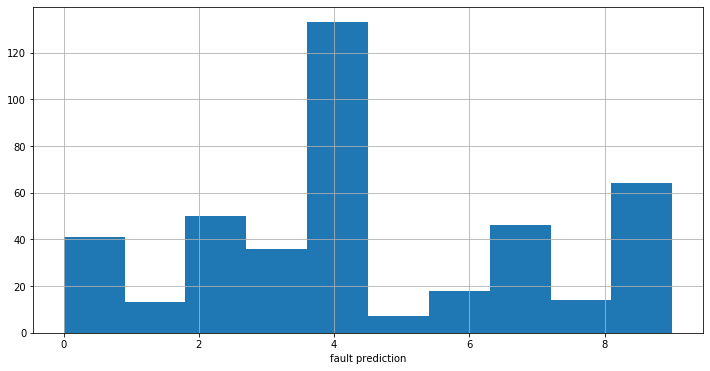

In [39]:
plt.figure(figsize=(12,6))
plt.hist(res['predict'], bins=10)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

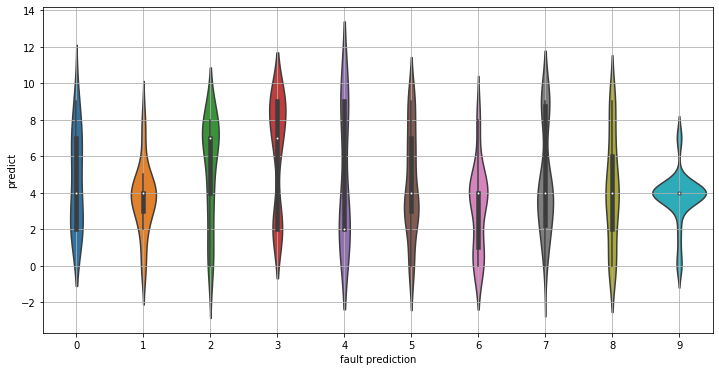

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(x='label', y='predict', data=res)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

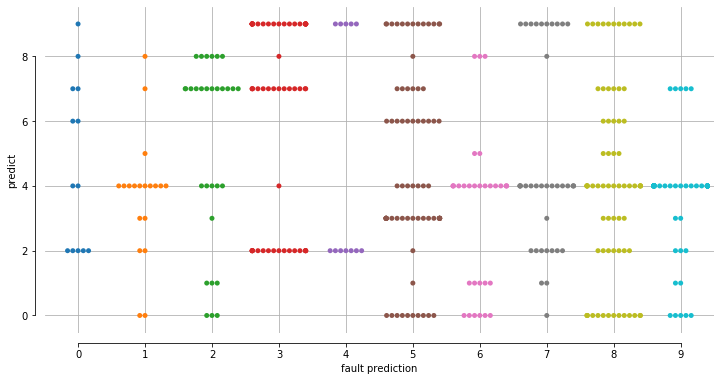

In [42]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='label', y='predict', data=res)
sns.despine(offset=10, trim=True)
plt.xlabel('fault prediction')
plt.grid()
plt.show()

In [74]:
ver = res.query('label==4').sample(n=8).index
ver

Int64Index([610, 9745, 247, 2053, 1549, 8520, 740, 3780], dtype='int64')

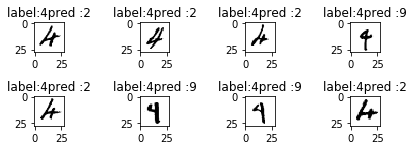

In [78]:
cnt = 0
for n in ver :
    cnt += 1
    plt.subplot(4, 4, cnt)
    plt.imshow(mnist.test.images[n].reshape(28,28), cmap='Greys')
    t = 'label:'+str(res['label'][n]) + 'pred :'+str(res['predict'][n])
    plt.title(t)
    
plt.tight_layout()
plt.show()

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [83]:
# seed 생성
seed = 40
np.random.seed(seed)
tf.random.set_random_seed(seed)

In [86]:
data = np.loadtxt('data/dataset/pima-indians-diabetes.csv', delimiter=',')
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [88]:
x = data[:,:-1]
y = data[:,[-1]]

In [92]:
model = Sequential()

model.add(Dense(units=12 ,input_dim=8, activation='relu'))
model.add(Dense(units=8 ,activation='relu'))
model.add(Dense(units=1 ,activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [95]:
model.fit(x, y, epochs=200, batch_size=10)



Epoch 1/200
768/768 [==============================] - ETA: 14s - loss: 108.8190 - accuracy: 0.300 - ETA: 0s - loss: 41.0458 - accuracy: 0.3588  - 0s 354us/step - loss: 32.8566 - accuracy: 0.4023
Epoch 2/200
768/768 [==============================] - ETA: 0s - loss: 6.9536 - accuracy: 0.60 - ETA: 0s - loss: 6.3886 - accuracy: 0.63 - ETA: 0s - loss: 5.8448 - accuracy: 0.62 - 0s 161us/step - loss: 5.7748 - accuracy: 0.6198
Epoch 3/200
768/768 [==============================] - ETA: 0s - loss: 1.5319 - accuracy: 0.70 - ETA: 0s - loss: 2.3889 - accuracy: 0.60 - 0s 135us/step - loss: 2.4121 - accuracy: 0.6224
Epoch 4/200
768/768 [==============================] - ETA: 0s - loss: 0.0711 - accuracy: 1.00 - ETA: 0s - loss: 1.8661 - accuracy: 0.65 - 0s 115us/step - loss: 1.8171 - accuracy: 0.6302
Epoch 5/200
768/768 [==============================] - ETA: 0s - loss: 0.8998 - accuracy: 0.70 - ETA: 0s - loss: 1.3916 - accuracy: 0.63 - 0s 105us/step - loss: 1.4703 - accuracy: 0.6471
Epoch 6/200


768/768 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.90 - ETA: 0s - loss: 0.5447 - accuracy: 0.72 - 0s 130us/step - loss: 0.5499 - accuracy: 0.7174
Epoch 43/200
768/768 [==============================] - ETA: 0s - loss: 0.6242 - accuracy: 0.70 - ETA: 0s - loss: 0.5583 - accuracy: 0.71 - 0s 120us/step - loss: 0.5602 - accuracy: 0.7253
Epoch 44/200
768/768 [==============================] - ETA: 0s - loss: 0.6431 - accuracy: 0.60 - ETA: 0s - loss: 0.5833 - accuracy: 0.68 - 0s 116us/step - loss: 0.5699 - accuracy: 0.7031
Epoch 45/200
768/768 [==============================] - ETA: 0s - loss: 0.5711 - accuracy: 0.60 - ETA: 0s - loss: 0.6402 - accuracy: 0.66 - 0s 112us/step - loss: 0.6124 - accuracy: 0.6940
Epoch 46/200
768/768 [==============================] - ETA: 0s - loss: 0.2975 - accuracy: 0.90 - ETA: 0s - loss: 0.5260 - accuracy: 0.73 - ETA: 0s - loss: 0.5727 - accuracy: 0.71 - 0s 145us/step - loss: 0.5701 - accuracy: 0.7161
Epoch 47/200
768/768 [=========

768/768 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.90 - ETA: 0s - loss: 0.5193 - accuracy: 0.76 - 0s 118us/step - loss: 0.5349 - accuracy: 0.7565
Epoch 86/200
768/768 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.80 - ETA: 0s - loss: 0.5135 - accuracy: 0.73 - 0s 115us/step - loss: 0.5069 - accuracy: 0.7435
Epoch 87/200
768/768 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.70 - ETA: 0s - loss: 0.5472 - accuracy: 0.74 - 0s 113us/step - loss: 0.5244 - accuracy: 0.7461
Epoch 88/200
768/768 [==============================] - ETA: 0s - loss: 0.4274 - accuracy: 0.80 - ETA: 0s - loss: 0.5063 - accuracy: 0.77 - 0s 112us/step - loss: 0.5234 - accuracy: 0.7565
Epoch 89/200
768/768 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.60 - ETA: 0s - loss: 0.4866 - accuracy: 0.75 - 0s 112us/step - loss: 0.5369 - accuracy: 0.7253
Epoch 90/200
768/768 [==============================] - ETA: 0s - loss: 0

768/768 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.70 - ETA: 0s - loss: 0.4868 - accuracy: 0.77 - 0s 103us/step - loss: 0.4884 - accuracy: 0.7708
Epoch 129/200
768/768 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.90 - ETA: 0s - loss: 0.4798 - accuracy: 0.76 - 0s 105us/step - loss: 0.4929 - accuracy: 0.7708
Epoch 130/200
768/768 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.90 - ETA: 0s - loss: 0.5459 - accuracy: 0.72 - 0s 92us/step - loss: 0.5312 - accuracy: 0.7331
Epoch 131/200
768/768 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.70 - ETA: 0s - loss: 0.5128 - accuracy: 0.75 - 0s 95us/step - loss: 0.4989 - accuracy: 0.7591
Epoch 132/200
768/768 [==============================] - ETA: 0s - loss: 0.5516 - accuracy: 0.60 - ETA: 0s - loss: 0.4655 - accuracy: 0.78 - 0s 92us/step - loss: 0.4712 - accuracy: 0.7760
Epoch 133/200
768/768 [==============================] - ETA: 0s - loss:

768/768 [==============================] - ETA: 0s - loss: 0.2820 - accuracy: 1.00 - ETA: 0s - loss: 0.4508 - accuracy: 0.79 - 0s 103us/step - loss: 0.4641 - accuracy: 0.7747
Epoch 172/200
768/768 [==============================] - ETA: 0s - loss: 0.3945 - accuracy: 0.90 - ETA: 0s - loss: 0.4714 - accuracy: 0.77 - 0s 104us/step - loss: 0.4943 - accuracy: 0.7656
Epoch 173/200
768/768 [==============================] - ETA: 0s - loss: 0.7807 - accuracy: 0.50 - ETA: 0s - loss: 0.4877 - accuracy: 0.76 - 0s 104us/step - loss: 0.4785 - accuracy: 0.7643
Epoch 174/200
768/768 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.80 - ETA: 0s - loss: 0.4793 - accuracy: 0.77 - 0s 100us/step - loss: 0.4915 - accuracy: 0.7682
Epoch 175/200
768/768 [==============================] - ETA: 0s - loss: 0.5114 - accuracy: 0.70 - ETA: 0s - loss: 0.4953 - accuracy: 0.76 - 0s 98us/step - loss: 0.4906 - accuracy: 0.7708
Epoch 176/200
768/768 [==============================] - ETA: 0s - los

In [96]:
model.evaluate(x,y)

768/768 [==============================] - ETA:  - 0s 91us/step


[0.45319606363773346, 0.7942708134651184]

In [440]:
from keras.datasets import mnist
(trainImage, trainLabel), (testImage, testLabel) = mnist.load_data()

In [441]:
digit = trainImage[3]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [442]:
model2 = Sequential()
model2.add(Dense(512, input_dim=(28*28), activation='relu'))

model2.add(Dense(10, activation='softmax'))

In [443]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [444]:
trainImage = trainImage.reshape((60000,28*28))
trainImage = trainImage.astype('float32')/255.0
testImage = testImage.reshape((10000,28*28))
testImage = testImage.astype('float32')/255.0

In [445]:
from keras.utils import to_categorical
trainLabel = to_categorical(trainLabel)
testLabel = to_categorical(testLabel)

In [447]:
model2.fit(trainImage, trainLabel, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - ETA: 32s - loss: 2.3530 - accuracy: 0.109 - ETA: 6s - loss: 1.3254 - accuracy: 0.616 - ETA: 4s - loss: 1.0223 - accuracy: 0.71 - ETA: 4s - loss: 0.8660 - accuracy: 0.76 - ETA: 3s - loss: 0.7663 - accuracy: 0.78 - ETA: 3s - loss: 0.7153 - accuracy: 0.80 - ETA: 3s - loss: 0.6678 - accuracy: 0.81 - ETA: 3s - loss: 0.6214 - accuracy: 0.82 - ETA: 3s - loss: 0.5924 - accuracy: 0.83 - ETA: 3s - loss: 0.5686 - accuracy: 0.83 - ETA: 3s - loss: 0.5434 - accuracy: 0.84 - ETA: 2s - loss: 0.5248 - accuracy: 0.85 - ETA: 2s - loss: 0.5083 - accuracy: 0.85 - ETA: 2s - loss: 0.4945 - accuracy: 0.86 - ETA: 2s - loss: 0.4811 - accuracy: 0.86 - ETA: 2s - loss: 0.4668 - accuracy: 0.86 - ETA: 2s - loss: 0.4540 - accuracy: 0.87 - ETA: 2s - loss: 0.4445 - accuracy: 0.87 - ETA: 2s - loss: 0.4322 - accuracy: 0.87 - ETA: 2s - loss: 0.4222 - accuracy: 0.87 - ETA: 2s - loss: 0.4116 - accuracy: 0.88 - ETA: 2s - loss: 0.4052 - accuracy: 0.88 - ETA: 2s - loss: 

60000/60000 [==============================] - ETA: 4s - loss: 0.0452 - accuracy: 0.99 - ETA: 3s - loss: 0.0654 - accuracy: 0.98 - ETA: 3s - loss: 0.0541 - accuracy: 0.98 - ETA: 3s - loss: 0.0567 - accuracy: 0.98 - ETA: 3s - loss: 0.0546 - accuracy: 0.98 - ETA: 2s - loss: 0.0521 - accuracy: 0.98 - ETA: 2s - loss: 0.0514 - accuracy: 0.98 - ETA: 2s - loss: 0.0492 - accuracy: 0.98 - ETA: 2s - loss: 0.0500 - accuracy: 0.98 - ETA: 2s - loss: 0.0494 - accuracy: 0.98 - ETA: 2s - loss: 0.0485 - accuracy: 0.98 - ETA: 2s - loss: 0.0494 - accuracy: 0.98 - ETA: 2s - loss: 0.0480 - accuracy: 0.98 - ETA: 2s - loss: 0.0485 - accuracy: 0.98 - ETA: 2s - loss: 0.0485 - accuracy: 0.98 - ETA: 2s - loss: 0.0497 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 2s - loss: 0.0480 - accuracy: 0.98 - ETA: 2s - loss: 0.0475 - accuracy: 0.98 - ETA: 2s - loss: 0.0486 - accuracy: 0.98 - ETA: 2s - loss: 0.0490 - accuracy: 0.98 - ETA: 2s - loss: 0.0499 - accuracy: 0.98 - ETA: 2s - loss: 0.0498 - accu

In [448]:
model2.evaluate(testImage, testLabel)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 49us/step


[0.06957798550911248, 0.9775000214576721]

In [ ]:
'''
3차원 텐서
일반적 이미지 (개수 , 높이, 너비, 차원(3))
싸아노 이미지 (개수 , 차원(3), 높이, 너비)

비디오 : 5차원 텐서
: (프레임, 높이, 너비, 채널, )
ex. 60초 짜리, 100*200 유튜브 비디오
    초당 4프레임을 샘플링 / 4*60 = 240 프레임 / 비디오 클립 5개
    (5, 240, 100, 200, 3)
'''

In [111]:
# 영화 리뷰 분류
from keras.datasets import imdb

In [114]:
# 자주 사용된 10000개 단어만 추출
imdb.load_data(num_words=10000)



14868480/17464789 [========================>.....] - ETA:  - ETA: 5: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: -

17465344/17464789 [==============================] - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 194, 1153, 194, 8255, 78, 

In [115]:
(trainData, trainLabel),(testData, testLabel) = imdb.load_data(num_words=10000)

In [120]:
trainData[0]  # 218개 단어
trainLabel[0]  # 1 : 긍정

218

In [121]:
[len(seq) for seq in trainData]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [126]:
wordindex = imdb.get_word_index()
wordindex

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [129]:
rev_wordIndex = dict([(value,key) for (key, value) in wordindex.items()])
rev_wordIndex

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [152]:
#                                   key key값이 없으면 출력
decReview = ' '.join([rev_wordIndex.get(i-3, '?') for i in trainData[1]])

In [167]:
# 동일한 길이의 리스트가 되도록 패딩 작업 수행
def vec_seq(data, dim=10000):
    res = np.zeros((len(data), dim))
    
    for i,s in enumerate(data) :
        res[i,s] = 1
    
    return res
    
xTrain = vec_seq(trainData)
xTest = vec_seq(testData)

In [171]:
print(xTrain[0])
print(xTest[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [174]:
yTrain = trainLabel.astype('float32')
yTest = testLabel.astype('float32')

In [177]:
# 신경망 모델
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10000))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [178]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
# 검증셋 뽑기
xVal = xTrain[:10000]
p_xTrain = xTrain[10000:]
yVal = yTrain[:10000]
p_yTrain = yTrain[10000:]

In [182]:
model.fit(p_xTrain, p_yTrain, epochs=20 , batch_size=512, validation_data=(xVal,yVal))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - ETA: 6s - loss: 0.6942 - accuracy: 0.48 - ETA: 4s - loss: 0.6920 - accuracy: 0.51 - ETA: 3s - loss: 0.6892 - accuracy: 0.55 - ETA: 3s - loss: 0.6855 - accuracy: 0.57 - ETA: 2s - loss: 0.6826 - accuracy: 0.58 - ETA: 2s - loss: 0.6784 - accuracy: 0.59 - ETA: 2s - loss: 0.6740 - accuracy: 0.61 - ETA: 2s - loss: 0.6686 - accuracy: 0.62 - ETA: 1s - loss: 0.6634 - accuracy: 0.63 - ETA: 1s - loss: 0.6583 - accuracy: 0.64 - ETA: 1s - loss: 0.6522 - accuracy: 0.66 - ETA: 1s - loss: 0.6467 - accuracy: 0.67 - ETA: 1s - loss: 0.6424 - accuracy: 0.67 - ETA: 1s - loss: 0.6369 - accuracy: 0.68 - ETA: 1s - loss: 0.6309 - accuracy: 0.69 - ETA: 1s - loss: 0.6241 - accuracy: 0.70 - ETA: 0s - loss: 0.6184 - accuracy: 0.71 - ETA: 0s - loss: 0.6134 - accuracy: 0.71 - ETA: 0s - loss: 0.6076 - accuracy: 0.72 - ETA: 0s - loss: 0.6032 - accuracy: 0.72 - ETA: 0s - loss: 0.5980 - accuracy: 0.72 - ETA: 0s - 

Epoch 7/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0840 - accuracy: 0.97 - ETA: 1s - loss: 0.0736 - accuracy: 0.98 - ETA: 1s - loss: 0.0708 - accuracy: 0.98 - ETA: 1s - loss: 0.0676 - accuracy: 0.98 - ETA: 1s - loss: 0.0666 - accuracy: 0.98 - ETA: 1s - loss: 0.0676 - accuracy: 0.98 - ETA: 1s - loss: 0.0677 - accuracy: 0.98 - ETA: 1s - loss: 0.0679 - accuracy: 0.98 - ETA: 1s - loss: 0.0709 - accuracy: 0.98 - ETA: 1s - loss: 0.0699 - accuracy: 0.98 - ETA: 1s - loss: 0.0711 - accuracy: 0.98 - ETA: 0s - loss: 0.0703 - accuracy: 0.98 - ETA: 0s - loss: 0.0703 - accuracy: 0.98 - ETA: 0s - loss: 0.0702 - accuracy: 0.98 - ETA: 0s - loss: 0.0697 - accuracy: 0.98 - ETA: 0s - loss: 0.0696 - accuracy: 0.98 - ETA: 0s - loss: 0.0691 - accuracy: 0.98 - ETA: 0s - loss: 0.0694 - accuracy: 0.98 - ETA: 0s - loss: 0.0688 - accuracy: 0.98 - ETA: 0s - loss: 0.0684 - accuracy: 0.98 - ETA: 0s - loss: 0.0678 - accuracy: 0.98 - ETA: 0s - loss: 0.0674 - accuracy: 0.98 - ETA: 0s - loss: 0.

Epoch 13/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0124 - accuracy: 1.00 - ETA: 1s - loss: 0.0121 - accuracy: 1.00 - ETA: 1s - loss: 0.0115 - accuracy: 1.00 - ETA: 1s - loss: 0.0113 - accuracy: 1.00 - ETA: 1s - loss: 0.0117 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0114 - accuracy: 0.99 - ETA: 1s - loss: 0.0110 - accuracy: 0.99 - ETA: 1s - loss: 0.0111 - accuracy: 0.99 - ETA: 1s - loss: 0.0109 - accuracy: 0.99 - ETA: 1s - loss: 0.0109 - accuracy: 0.99 - ETA: 1s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0113 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0111 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0.0112 - accuracy: 0.99 - ETA: 0s - loss: 0

Epoch 19/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0028 - accuracy: 1.00 - ETA: 1s - loss: 0.0031 - accuracy: 1.00 - ETA: 1s - loss: 0.0032 - accuracy: 1.00 - ETA: 1s - loss: 0.0031 - accuracy: 1.00 - ETA: 1s - loss: 0.0032 - accuracy: 1.00 - ETA: 1s - loss: 0.0040 - accuracy: 0.99 - ETA: 1s - loss: 0.0039 - accuracy: 0.99 - ETA: 1s - loss: 0.0039 - accuracy: 0.99 - ETA: 1s - loss: 0.0039 - accuracy: 0.99 - ETA: 1s - loss: 0.0039 - accuracy: 0.99 - ETA: 1s - loss: 0.0038 - accuracy: 0.99 - ETA: 1s - loss: 0.0038 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - ETA: 0s - loss: 0.0036 - accuracy: 0.99 - ETA: 0s - loss: 0.0036 - accuracy: 0.99 - ETA: 0s - loss: 0

In [187]:
history = model.history
historyDict = history.history

historyDict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [190]:
# 시각화
acc = historyDict['accuracy']
val_acc = historyDict['val_accuracy']
loss = historyDict['loss']
val_loss = historyDict['val_loss']

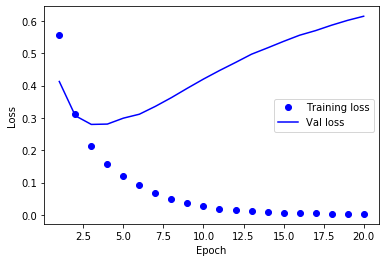

In [194]:
epo = range(1,len(acc)+1)
plt.plot(epo, loss, 'bo', label='Training loss')
plt.plot(epo, val_loss, 'b', label='Val loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

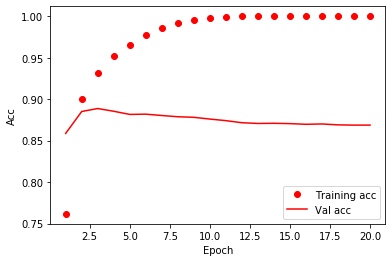

In [195]:
plt.plot(epo, acc, 'ro', label='Training acc')
plt.plot(epo, val_acc, 'r', label='Val acc')

plt.xlabel('Epoch')
plt.ylabel('Acc')

plt.legend()
plt.show()

In [196]:
model.evaluate(xTest, yTest)

25000/25000 [==============================] - ETA: 3: - ETA: 20s - ETA: 11 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 170us/step


[0.6623750211119652, 0.8580800294876099]

In [416]:
# MNIST 데이터셋 다운로드
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [417]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

w1 = tf.get_variable('w1', shape=[28*28, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable('w2', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2)+b2)

w3 = tf.get_variable('w3', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
l3 = tf.nn.relu(tf.matmul(l2,w3)+b3)

w4 = tf.get_variable('w4', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]))
l4 = tf.nn.relu(tf.matmul(l3,w4)+b4)

w5 = tf.get_variable('w5', shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))


hf = tf.nn.softmax(tf.matmul(l4,w5)+b5)                         # score
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))

train = tf.train.AdamOptimizer(0.001).minimize(cost)
'''                 ||
- 전통적 경사하강법 : 매번 미분함 => 속도 느림
- 확률적 경사하강법(sgd) : 속도 개선
- 모멘텀(momentum : 관성, 가속도) sgd : sgd + 관성
- 아다그리드 : step size 개선
- rmsprop : 아다그리드 개선
- 아담(Adam) : 모멘턴 + rmsprop
'''

prediction = tf.equal(tf.argmax(hf, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [418]:
trainingEpochs = 15
batch_size = 100

In [419]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(trainingEpochs) :
        avgCost = 0
        totalBatch = int(mnist.train.num_examples/batch_size)
        for i in range(totalBatch) :
            batchX, batchY = mnist.train.next_batch(batch_size=batch_size)
            _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:batchX, y:batchY})
            avgCost += cv/totalBatch
        if epoch % 2 == 0 :
            print('Step : {}, cost : {}, acc : {}'.format(epoch, avgCost, acc))
    print('정확도 : ', sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

Step : 0, cost : 1.6161006827787903, acc : 0.9599999785423279
Step : 2, cost : 1.5081015831773934, acc : 0.949999988079071
Step : 4, cost : 1.4997079645503655, acc : 0.9200000166893005
Step : 6, cost : 1.4959721237962886, acc : 0.9700000286102295
Step : 8, cost : 1.496882734298706, acc : 0.9700000286102295
Step : 10, cost : 1.4962729484384736, acc : 0.9800000190734863
Step : 12, cost : 1.499160553758796, acc : 0.9800000190734863
Step : 14, cost : 1.4962168093161141, acc : 0.9700000286102295
정확도 :  0.9585


In [239]:
from keras.datasets import boston_housing

In [266]:
(trainData, trainTarget), (testData, testTarget) = boston_housing.load_data()

In [267]:
trainTarget = trainTarget.reshape(404,1)
testTarget = testTarget.reshape(102,1)

In [268]:
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [269]:
# 데이터 정규화

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(trainData)
trainData = scaler.transform(trainData)
testData = scaler.transform(testData)

scaler.fit(trainTarget)
trainTarget = scaler.transform(trainTarget)
testTarget = scaler.transform(testTarget)

In [270]:
# keras 모델
model = Sequential()

In [271]:
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mse'])

model.fit(trainData, trainTarget, epochs=50, batch_size=128)

Epoch 1/50
404/404 [==============================] - ETA: 0s - loss: 0.0484 - mae: 0.1557 - mse: 0.048 - 0s 386us/step - loss: 0.0418 - mae: 0.1439 - mse: 0.0418
Epoch 2/50
404/404 [==============================] - ETA: 0s - loss: 0.0452 - mae: 0.1495 - mse: 0.045 - 0s 25us/step - loss: 0.0408 - mae: 0.1436 - mse: 0.0408
Epoch 3/50
404/404 [==============================] - ETA: 0s - loss: 0.0430 - mae: 0.1457 - mse: 0.043 - 0s 22us/step - loss: 0.0402 - mae: 0.1401 - mse: 0.0402
Epoch 4/50
404/404 [==============================] - ETA: 0s - loss: 0.0432 - mae: 0.1425 - mse: 0.043 - 0s 25us/step - loss: 0.0396 - mae: 0.1386 - mse: 0.0396
Epoch 5/50
404/404 [==============================] - ETA: 0s - loss: 0.0446 - mae: 0.1521 - mse: 0.044 - 0s 25us/step - loss: 0.0391 - mae: 0.1374 - mse: 0.0391
Epoch 6/50
404/404 [==============================] - ETA: 0s - loss: 0.0346 - mae: 0.1315 - mse: 0.034 - 0s 25us/step - loss: 0.0387 - mae: 0.1359 - mse: 0.0387
Epoch 7/50
404/404 [=======

In [280]:
loss, mae, mse = model.evaluate(testData, testTarget)

102/102 [==============================] - ETA:  - 0s 59us/step


array([[ 6.10326012, 10.21595072,  6.10326013]])

In [282]:
print('Test 결과 \n loss : {:.5f}, mae : {:.5f}, mse : {:.5f}'.format(loss, mae, mse))

Test 결과 
 loss : 0.02452, mae : 0.11591, mse : 0.02452


In [285]:
scaler.inverse_transform([[loss, mae, mse]])

array([[ 6.10326012, 10.21595072,  6.10326013]])

In [ ]:
# tensorflow 모델

In [292]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 13])
y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.get_variable('w1', shape=[13,13], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([13], dtype=tf.float32))
l1 = tf.matmul(x, w1) + b1

w2 = tf.get_variable('w2', shape=[13,6], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([6], dtype=tf.float32))
l2 = tf.matmul(l1, w2) + b2

w3 = tf.get_variable('w3', shape=[6,1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1], dtype=tf.float32))

hf = tf.matmul(l2, w3) + b3
cost = tf.reduce_mean(tf.square(hf - y))

lr = 0.01
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [302]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001) :
        _, cv = sess.run([train, cost], feed_dict={x:trainData, y:trainTarget})
        if step % 100 == 0 :
            print('{} Step Cost : {}'.format(step, cv))
            
    print('\n Test Cost : %s' % sess.run(cost, feed_dict={x:testData, y:testTarget}))

0 Step Cost : 0.2237742394208908
100 Step Cost : 0.059980422258377075
200 Step Cost : 0.0411735437810421
300 Step Cost : 0.031860578805208206
400 Step Cost : 0.026149990037083626
500 Step Cost : 0.022333474829792976
600 Step Cost : 0.019657190889120102
700 Step Cost : 0.017720825970172882
800 Step Cost : 0.016288066282868385
900 Step Cost : 0.015209147706627846
1000 Step Cost : 0.014384493231773376
1100 Step Cost : 0.013745652511715889
1200 Step Cost : 0.013244528323411942
1300 Step Cost : 0.012846812605857849
1400 Step Cost : 0.012527679093182087
1500 Step Cost : 0.012269007042050362
1600 Step Cost : 0.012057404965162277
1700 Step Cost : 0.011882875114679337
1800 Step Cost : 0.011737867258489132
1900 Step Cost : 0.01161659974604845
2000 Step Cost : 0.011514609679579735

 Test Cost : 0.011128846


In [452]:
data = pd.read_csv('data/dataset/iris.csv', header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [453]:
x = data.iloc[:,:-1]
y = pd.get_dummies(data[4])

xy = pd.concat([x,y], axis=1)
xy

,0,1,2,3,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [454]:
xy = np.array(xy)
x = xy[:,:4]
y = xy[:,4:]

In [455]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [456]:
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [457]:
from sklearn.model_selection import train_test_split

In [458]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1004)

In [459]:
# tensorflow 모델

In [460]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 3])

w1 = tf.get_variable('w1', shape=[4,4], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([4]))
l1 = tf.nn.relu(tf.matmul(x, w1) + b1) 

w2 = tf.get_variable('w2', shape=[4,4], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([4]))
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2) 

w3 = tf.get_variable('w3', shape=[4,1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]))

hf = tf.nn.softmax(tf.matmul(l2, w3) + b3)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=hf))

lr = 0.1
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

In [461]:
predict = tf.argmax(hf, 1)
correct = tf.equal(tf.argmax(hf, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [462]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(2001) :
        _, cv, acc = sess.run([train, cost, accuracy], feed_dict={x:xTrain, y:yTrain})
        if step % 100 == 0 :
            print('{}Step Cost : {}, Acc : {}'.format(step, cv, acc))

0Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
100Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
200Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
300Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
400Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
500Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
600Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
700Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
800Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
900Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1000Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1100Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1200Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1300Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1400Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1500Step Cost : 1.0986120700836182, Acc : 0.3523809611797333
1600Step Cost : 1.0986120700836182, 

In [466]:
xTrain.shape

(105, 4)

In [369]:
# keras 모델로 분류하기

In [474]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
# model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(xTrain, yTrain, epochs=50, batch_size=64)

Epoch 1/50
105/105 [==============================] - ETA: 0s - loss: 0.9620 - accuracy: 0.31 - 0s 1ms/step - loss: 0.9631 - accuracy: 0.3143
Epoch 2/50
105/105 [==============================] - ETA: 0s - loss: 0.9342 - accuracy: 0.34 - 0s 57us/step - loss: 0.9598 - accuracy: 0.3143
Epoch 3/50
105/105 [==============================] - ETA: 0s - loss: 0.9791 - accuracy: 0.28 - 0s 48us/step - loss: 0.9567 - accuracy: 0.3143
Epoch 4/50
105/105 [==============================] - ETA: 0s - loss: 0.9902 - accuracy: 0.26 - 0s 67us/step - loss: 0.9536 - accuracy: 0.3143
Epoch 5/50
105/105 [==============================] - ETA: 0s - loss: 0.9192 - accuracy: 0.35 - 0s 67us/step - loss: 0.9503 - accuracy: 0.3143
Epoch 6/50
105/105 [==============================] - ETA: 0s - loss: 0.9416 - accuracy: 0.31 - 0s 57us/step - loss: 0.9474 - accuracy: 0.3143
Epoch 7/50
105/105 [==============================] - ETA: 0s - loss: 0.9899 - accuracy: 0.25 - 0s 67us/step - loss: 0.9446 - accuracy: 0.3143


In [475]:
model.evaluate(xTest, yTest, batch_size=64)

45/45 [==============================] - 0s 1ms/step


[0.7996052503585815, 0.6666666865348816]